In [46]:
import os
import sys
from pathlib import Path
# Setting the working directory to the root of the project
project_dir = Path("C:/Users/adbou/source/repos/KFHXRelatedAi/")
os.chdir(project_dir)

from Configs.GeneralPaths import SOURCEDATA
import pandas as pd
import numpy as np

In [47]:
#load user transactions data
user_transactions = pd.read_excel(Path(SOURCEDATA / "Transaction_User.xlsx"))
new_user_tranaction = user_transactions.drop(columns=['TrxId'])
new_user_tranaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37951 entries, 0 to 37950
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   FK_BusinessUserId  37951 non-null  int64
 1   PointsRedeemed     37951 non-null  int64
 2   FK_ContentId       37951 non-null  int64
dtypes: int64(3)
memory usage: 889.6 KB


In [48]:
new_user_tranaction.head()

,FK_BusinessUserId,PointsRedeemed,FK_ContentId
0,976480,1000,113923
1,976480,10000,113853
2,976480,10000,113853
3,976921,10,113851
4,976480,50,113835


In [49]:
#load deals data
deals_data = pd.read_excel(Path(SOURCEDATA / "Cleaned_Deals.xlsx"))
deals_data = deals_data.drop(columns=['Unnamed: 0'])
deals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ContentId    200 non-null    int64 
 1   Title        200 non-null    object
 2   FK_StatusId  200 non-null    int64 
 3   Deal Type    200 non-null    object
 4   Description  200 non-null    object
 5   Location     178 non-null    object
 6   Points       200 non-null    int64 
 7   Categories   200 non-null    object
dtypes: int64(3), object(5)
memory usage: 12.6+ KB


In [50]:
deals_data.head()

,ContentId,Title,FK_StatusId,Deal Type,Description,Location,Points,Categories
0,113815,Off from Al Rifai,2,15 KD Voucher,Get a 15 KD discount voucher for your next onl...,https://www.google.com/maps/search/al+rifai+ku...,15000,F&B
1,113816,Off from Dip n dip,2,10 KD Voucher,Get 10 KD off on your next order from Dip n di...,NaN,10000,F&B
2,113817,Order from Dip n Dip and get discount,1,5KD discount,Order from Dip n Dip and get 5KD discount,https://www.google.com/maps/search/dipndip/@29...,5000,F&B
3,113818,Get discount from Ellena Bakery,2,3KD discount,Get 3KD discount from Ellena Bakery,https://maps.app.goo.gl/bnZXdfUbbaGFjFiJA,3000,F&B
4,113819,Off from Talabat,1,3 KD Voucher,Get 3KD discount from Talabat.,https://goo.gl/maps/5uoJEdD95W1YSpDt9,3000,F&B


In [51]:
#merging deals data with user transaction data :
new_user_tranaction = new_user_tranaction.merge(deals_data[['ContentId', 'Categories']], left_on='FK_ContentId', right_on='ContentId', how='left')
new_user_tranaction = new_user_tranaction.drop(columns=['ContentId'])
new_user_tranaction

,FK_BusinessUserId,PointsRedeemed,FK_ContentId,Categories
0,976480,1000,113923,Health & Beauty
1,976480,10000,113853,Retail
2,976480,10000,113853,Retail
3,976921,10,113851,F&B
4,976480,50,113835,Travel
...,...,...,...,...
37946,1048474,5000,115099,Travel
37947,1056928,6000,115217,Entertainment
37948,1075249,3500,115231,Entertainment
37949,1110587,6000,115217,Entertainment


In [52]:
user_item_matrix = new_user_tranaction.pivot_table(index='FK_BusinessUserId', columns='FK_ContentId', values='PointsRedeemed' ,aggfunc='sum', fill_value=0)
user_item_matrix

FK_ContentId,113816,113817,113819,113823,113824,113829,113830,113833,113834,113835,...,115217,115218,115221,115223,115225,115227,115229,115231,115244,115259
FK_BusinessUserId,,,,,,,,,,,,,,,,,,,,,
976480,0,0,0,0,0,0,0,0,0,50,...,0,0,0,0,0,0,0,0,0,0
976481,0,0,0,0,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976482,0,0,0,0,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976485,0,0,0,0,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1119351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.decomposition import PCA

# Assuming user_item_matrix is already created
pca = PCA(n_components=2)
user_item_pca = pca.fit_transform(user_item_matrix.fillna(0))


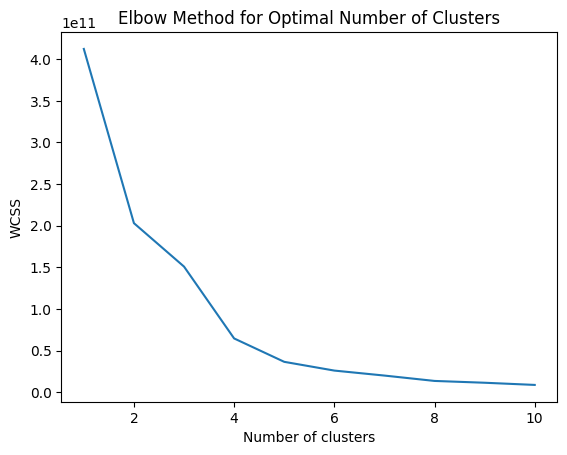

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(user_item_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [55]:

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(user_item_pca)


user_clusters = pd.DataFrame({'FK_BusinessUserId': user_item_matrix.index, 'Cluster': clusters})


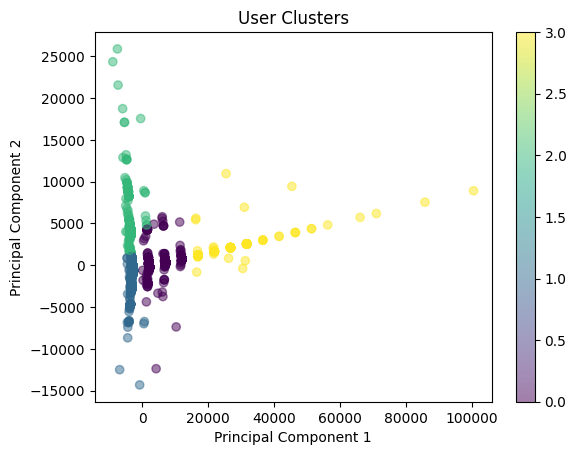

In [56]:
plt.scatter(user_item_pca[:, 0], user_item_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('User Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


In [57]:
final_ratings_matrix = new_user_tranaction.pivot_table(index = 'FK_BusinessUserId', columns ='FK_ContentId', values = 'PointsRedeemed').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (25054, 69)
given_num_of_ratings =  31061
possible_num_of_ratings =  1728726
density: 1.80%


FK_ContentId,113816,113817,113819,113823,113824,113829,113830,113833,113834,113835,...,115217,115218,115221,115223,115225,115227,115229,115231,115244,115259
FK_BusinessUserId,,,,,,,,,,,,,,,,,,,,,
976480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976481,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976482,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976485,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds

In [60]:
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 50) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)

In [61]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)

In [62]:
preds_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1728726 stored elements and shape (25054, 69)>

In [63]:
import numpy as np

def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):
    
    # Get the user's ratings from the actual and predicted interaction matrices
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})
    temp['Recommended Products'] = np.arange(len(user_ratings))
    temp = temp.set_index('Recommended Products')
    
    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.user_ratings == 0]   
    
    #Recommending products with top predicted ratings
    temp = temp.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

In [64]:
recommend_items(121,final_ratings_sparse,preds_matrix,5)


Below are the recommended products for user(user_id = 121):

Recommended Products
67    0.571431
14    0.384207
5     0.360355
33    0.281535
3     0.272552
Name: user_predictions, dtype: float64


In [65]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

FK_ContentId,113816,113817,113819,113823,113824,113829,113830,113833,113834,113835,...,115217,115218,115221,115223,115225,115227,115229,115231,115244,115259
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
average_rating = final_ratings_matrix.mean()
average_rating.head()

FK_ContentId
113816      0.399138
113817     72.842660
113819    229.544185
113823      0.798276
113824      2.035603
dtype: float64

In [67]:
preds_df.head()

FK_ContentId,113816,113817,113819,113823,113824,113829,113830,113833,113834,113835,...,115217,115218,115221,115223,115225,115227,115229,115231,115244,115259
0,0.006696,0.001349,0.016696,0.776338,0.000133,0.213974,0.772551,0.001390,0.003117,1.056566e+01,...,0.000743,0.028690,0.001247,0.004604,0.001572,0.004412,7.305205e-10,0.003073,0.015862,0.191912
1,0.003384,0.000922,0.001599,0.548333,0.007268,0.320831,0.897098,0.001305,0.006240,2.817817e-02,...,0.001546,0.007514,0.005775,0.022564,0.002147,0.008195,1.425405e-12,0.001931,1.758079,0.359998
2,0.004289,0.002234,0.004268,0.000106,0.007591,0.000050,0.000088,0.001308,0.006820,6.934216e-07,...,0.000453,0.009246,0.005810,0.023672,0.001354,0.008789,1.177578e-14,0.000790,0.000061,0.000091
3,0.003318,0.002146,0.003315,0.000015,0.002336,0.000010,0.000020,0.000945,0.003535,4.873450e-06,...,0.000653,0.002673,0.000930,0.004888,0.004328,0.003771,1.538623e-15,0.005763,0.000093,0.000007
4,0.005074,0.003108,0.031166,0.548377,0.015567,0.320858,0.897171,0.000953,0.003645,2.819025e-02,...,0.002747,0.001471,0.003855,0.021397,0.000218,0.004176,1.428516e-12,0.001399,1.757910,0.360037


In [68]:
avg_preds=preds_df.mean()
avg_preds.head()

FK_ContentId
113816      0.400534
113817     72.844139
113819    229.547167
113823      0.548591
113824      2.037206
dtype: float64

In [69]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings
FK_ContentId,,
113816,0.399138,0.400534
113817,72.842660,72.844139
113819,229.544185,229.547167
113823,0.798276,0.548591
113824,2.035603,2.037206


In [70]:

RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.12604837497535393 



c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
